In [1]:
import torch
from matplotlib import pyplot as plt
from models.stylegan2.model import Generator
from models import my_mapper

In [2]:
def draw_img(img, name=None):
    with torch.no_grad():
        img = img[0].cpu()
        scale = img.max()-img.min()
        d = img.min()/scale
        img = img.transpose(0,2).transpose(1,0)/scale-d
        img = img.numpy()
        if name is not None:
            plt.imsave(name, img)
        return plt.imshow(img)

In [4]:
stylegan_size = 1024
stylegan_path = 'stylegan2-ffhq-config-f.pt'

gen = Generator(stylegan_size, 512, 8)
gen.load_state_dict(torch.load(stylegan_path)["g_ema"], strict=False)
gen.eval()
gen = gen.cuda()
mean_latent = gen.mean_latent(4096)

In [6]:
mapper = my_mapper.load_mapper('cuda', './weights/mapper_curly_hairstyle.pt')

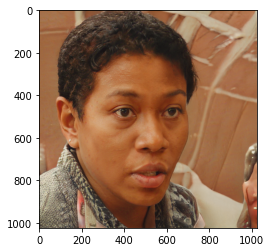

In [9]:
latent_code_init_not_trunc = torch.randn(1, 512).cuda()

with torch.no_grad():
    img_orig, latent_code_init, _ = gen([latent_code_init_not_trunc], return_latents=True, truncation=0.7, truncation_latent=mean_latent)

draw_img(img_orig)

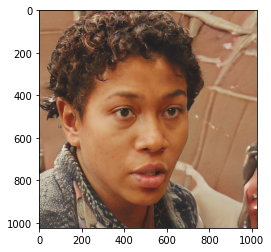

In [13]:
with torch.no_grad():
    new_latent = latent_code_init + mapper(latent_code_init)*0.05
    img_hat, _ = gen([new_latent], input_is_latent=True, randomize_noise=False)
draw_img(img_hat)